## Import all required libraries


In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

## Load Train and Test data

In [33]:
fashion_mnist = keras.datasets.fashion_mnist
(train_full_X, train_full_y), (test_X, test_y) = fashion_mnist.load_data()

In [34]:
#expand 1 more dimention as 1 for colour channel gray
train_full_X = train_full_X.reshape(train_full_X.shape[0], 28, 28,1)
test_X = test_X.reshape(test_X.shape[0], 28, 28,1)

## Preprocessing the digit images

In [35]:
# Z-score
mean_px = train_full_X.mean().astype(np.float32)
std_px = train_full_X.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

## Designing Convolutional Neural Network Architecture

In [36]:
model = Sequential([
    Lambda(standardize, input_shape=(28,28,1)),
    Convolution2D(32,(3,3), activation='relu'),
    Convolution2D(32,(3,3), activation='relu'),
    MaxPooling2D(),
    Convolution2D(64,(3,3), activation='relu'),
    Convolution2D(64,(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
    ])

Compile network

In [37]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

Split the data

In [38]:
train_X, val_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size=0.10, random_state=42)


Run the model

In [39]:
early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],verbose=1)

Epoch 1/200
106/106 [==============================] - 36s 332ms/step - loss: 2.2997 - accuracy: 0.1197 - val_loss: 2.2908 - val_accuracy: 0.1243
Epoch 2/200
106/106 [==============================] - 35s 328ms/step - loss: 2.2834 - accuracy: 0.1218 - val_loss: 2.2751 - val_accuracy: 0.1275
Epoch 3/200
106/106 [==============================] - 35s 327ms/step - loss: 2.2671 - accuracy: 0.1284 - val_loss: 2.2574 - val_accuracy: 0.1403
Epoch 4/200
106/106 [==============================] - 35s 330ms/step - loss: 2.2476 - accuracy: 0.1624 - val_loss: 2.2351 - val_accuracy: 0.2080
Epoch 5/200
106/106 [==============================] - 35s 328ms/step - loss: 2.2220 - accuracy: 0.2426 - val_loss: 2.2048 - val_accuracy: 0.2892
Epoch 6/200
106/106 [==============================] - 35s 327ms/step - loss: 2.1852 - accuracy: 0.3218 - val_loss: 2.1597 - val_accuracy: 0.3625
Epoch 7/200
106/106 [==============================] - 34s 325ms/step - loss: 2.1291 - accuracy: 0.3947 - val_loss: 2.0899 -

<AxesSubplot:title={'center':'Accuracy'}>

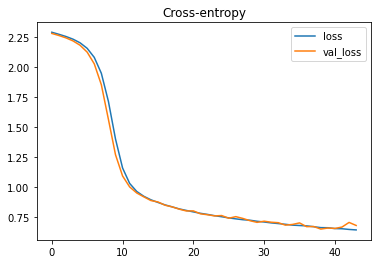

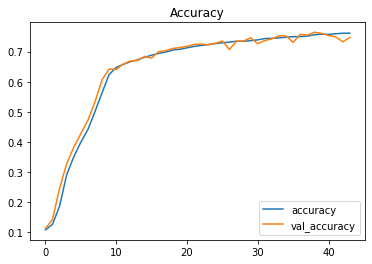

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 3s 10ms/step - loss: 0.6714 - accuracy: 0.7575


[0.6714022159576416, 0.7574999928474426]